# I] Import and options


In [86]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [87]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [88]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp3_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.head()

(21, 49)
Wall time: 25 ms


,Elapsed,Normal + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + DMSO,Normal + DMEM + BAF,EV + DMEM + BAF,WT1 + DMEM + BAF,...,WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + DMSO (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(1) + Starvation + BAF (Std Err Img),WT2 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img)
0,0.0,24.39035,16.41836,15.21034,22.82281,14.75954,26.45301,25.06012,20.23670,22.98873,...,2.571616,1.045481,3.876137,3.983611,1.030263,2.058213,1.948173,1.984569,4.804624,0.678808
1,2.0,27.69514,13.58894,16.44386,24.53672,21.51981,28.52942,26.62309,22.71008,22.72519,...,4.802834,5.147499,3.256859,2.376759,1.364859,1.534457,4.000645,4.015906,3.378443,1.731352
2,4.0,27.48056,20.55276,22.08571,26.04439,20.94364,28.40393,26.05117,18.43623,19.31658,...,2.510035,3.430700,3.378468,3.584839,1.775517,0.536620,2.349245,2.204135,4.388706,1.258005
3,6.0,34.94506,16.99988,19.35752,31.11562,28.53192,33.14337,33.07227,30.89482,30.96987,...,4.974185,2.870466,5.328044,3.129056,1.340992,2.755944,1.911276,5.193611,2.928637,0.822534
4,8.0,31.90584,35.82673,37.69317,38.88882,41.50595,44.49443,34.33729,30.44282,29.25338,...,9.461902,6.401154,7.452606,7.968461,5.882807,3.938062,1.904777,4.460423,3.589288,0.716547


In [89]:
#List of columns_ I have 6 cell lines per condition and 4 conditions

##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

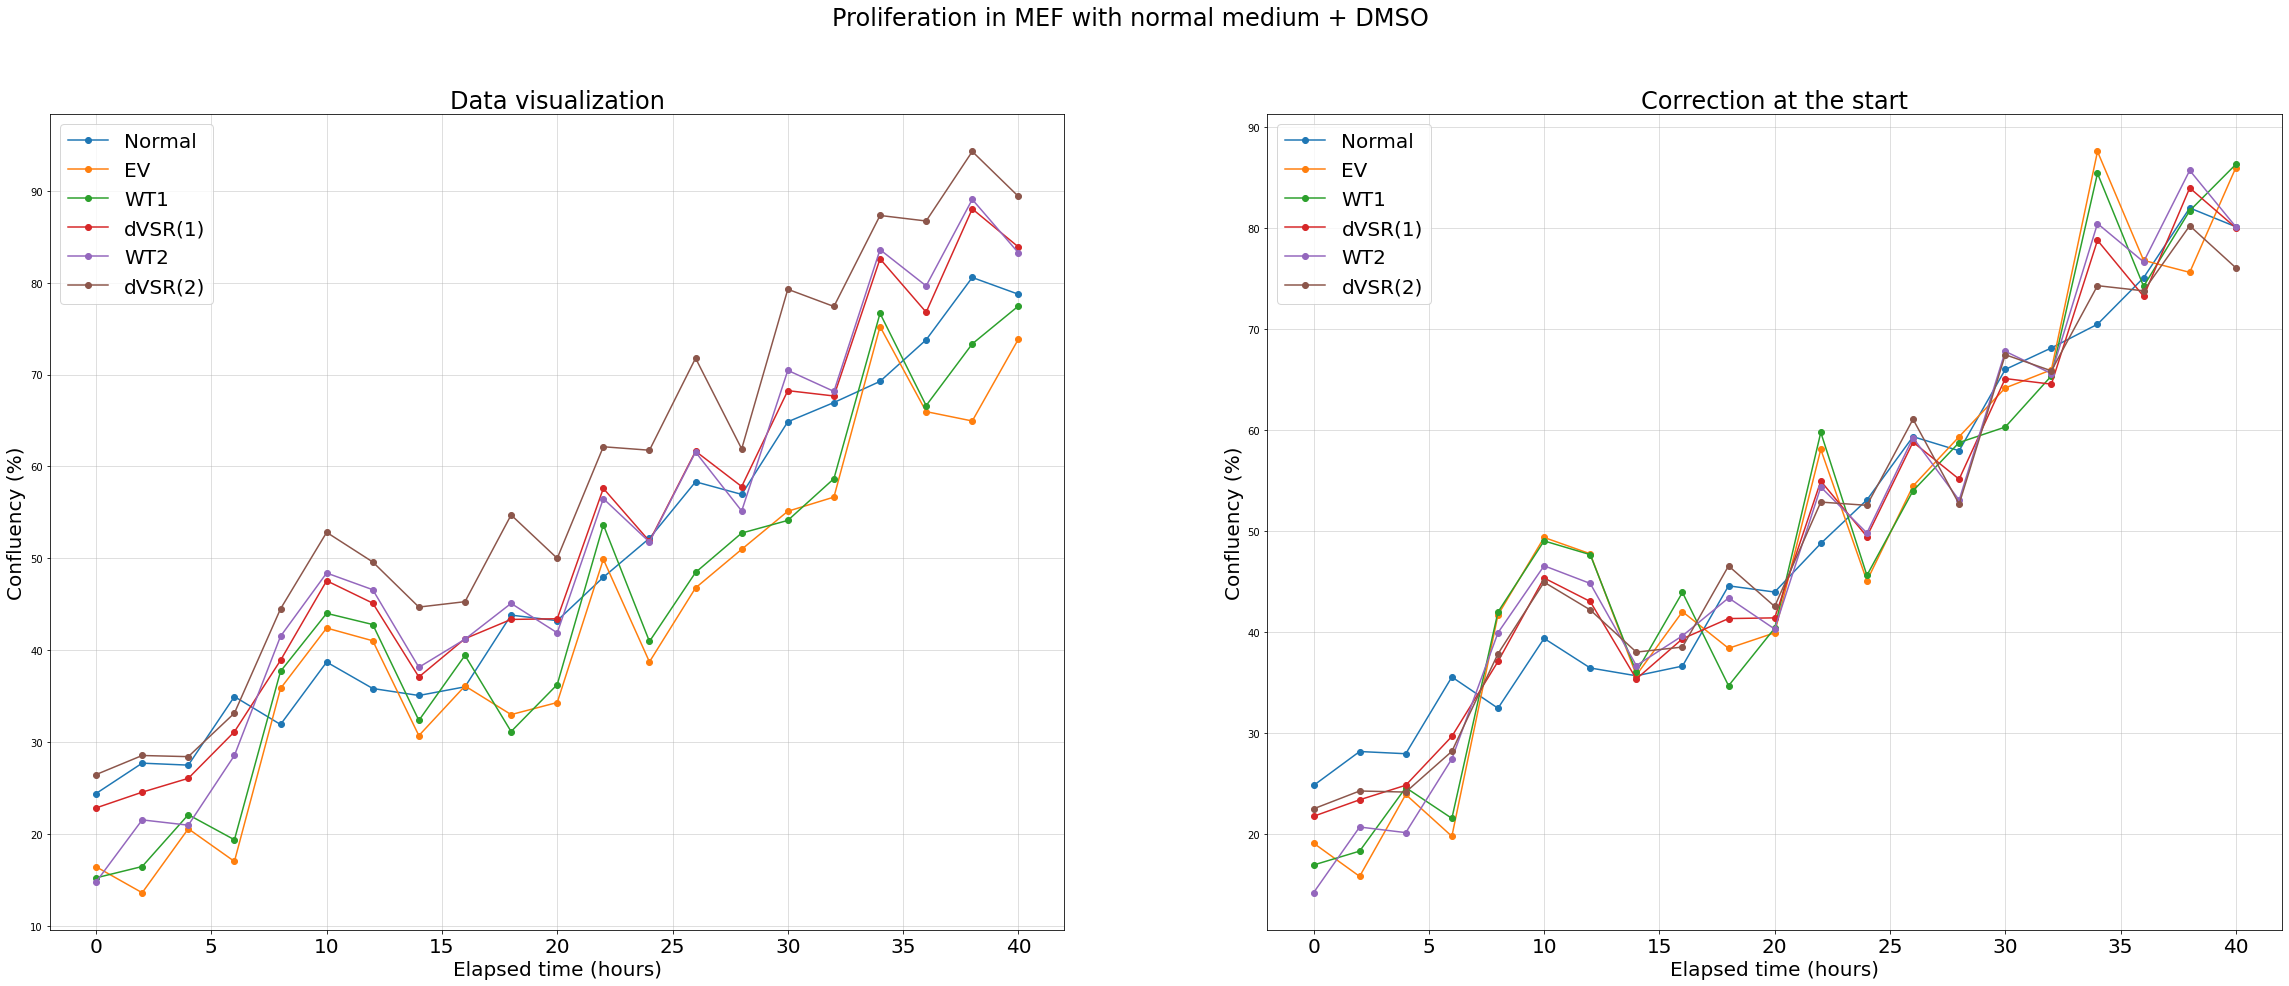

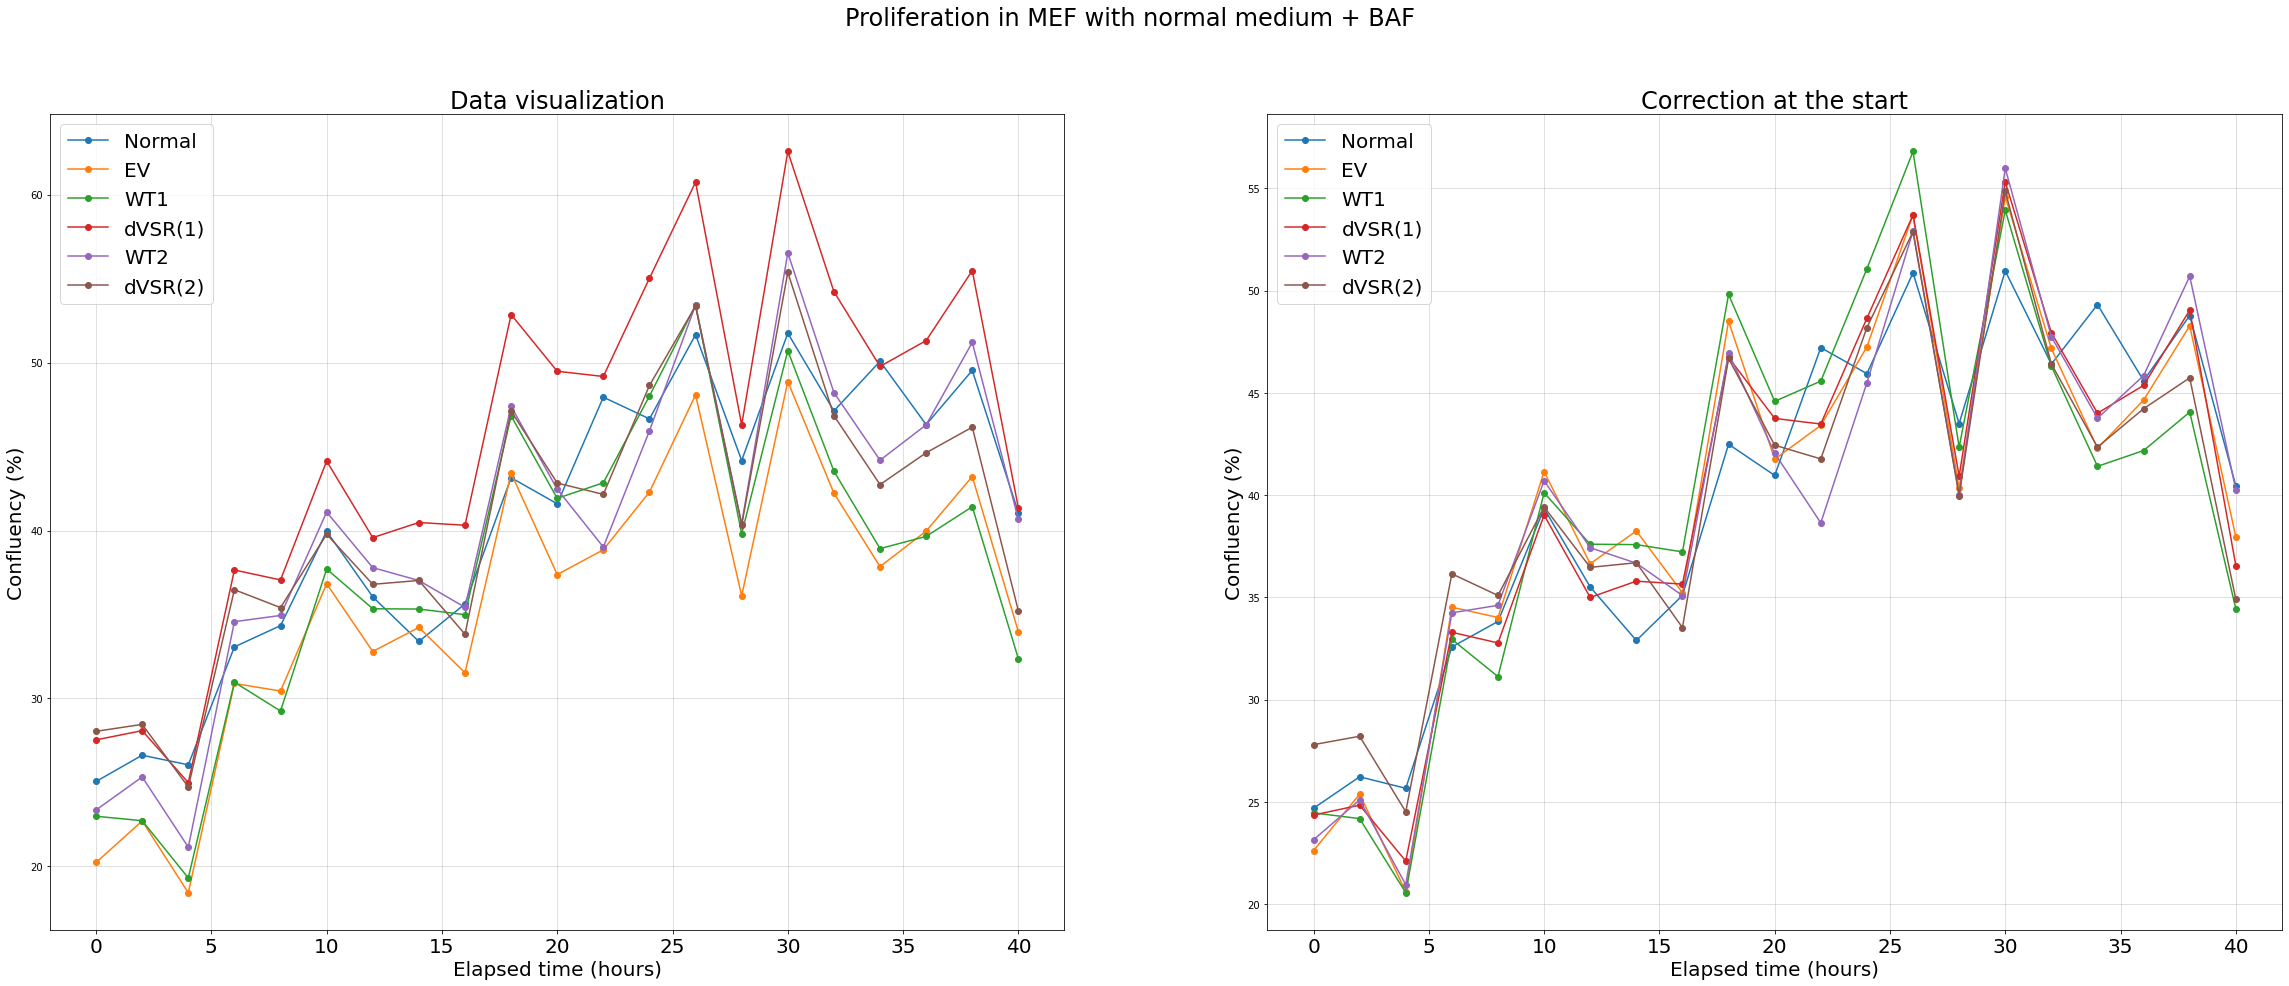

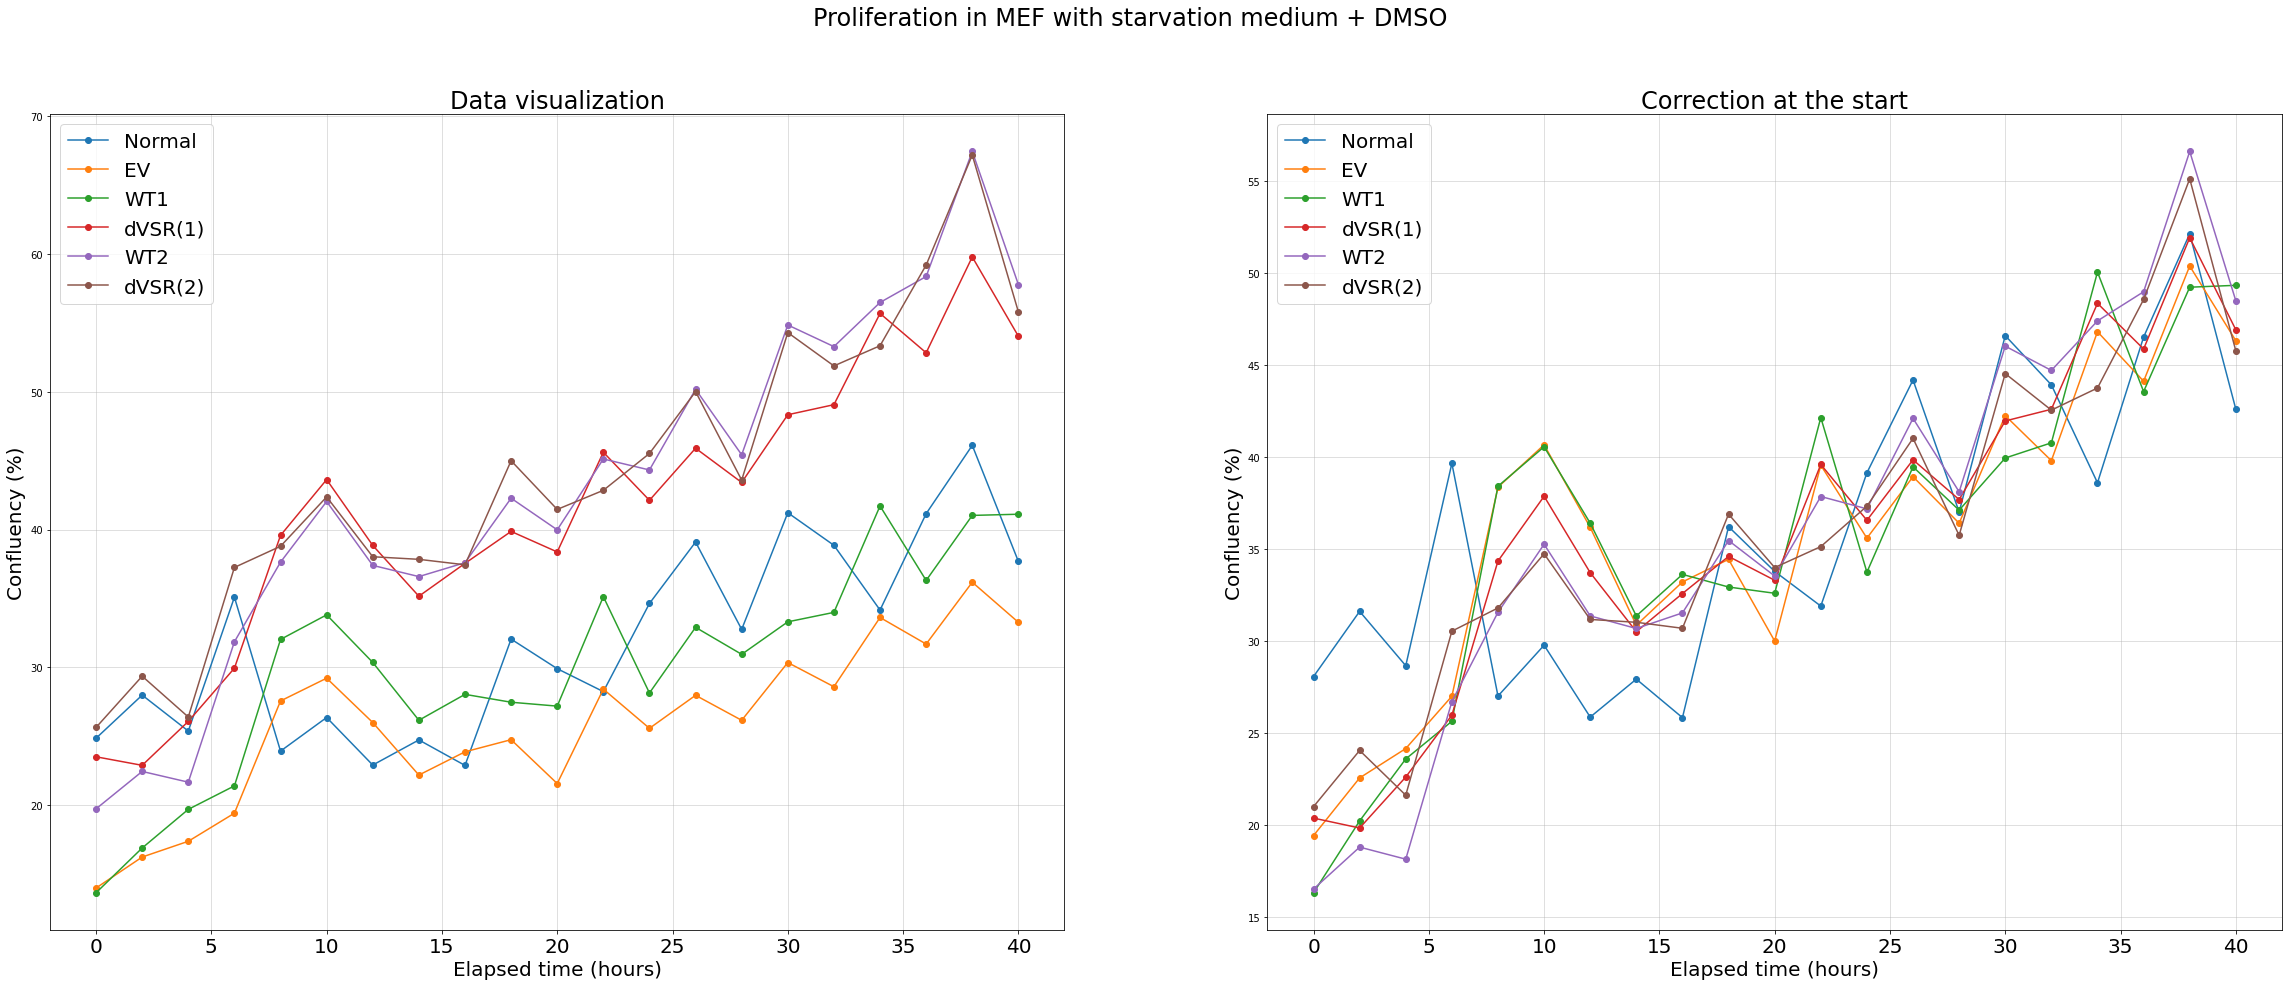

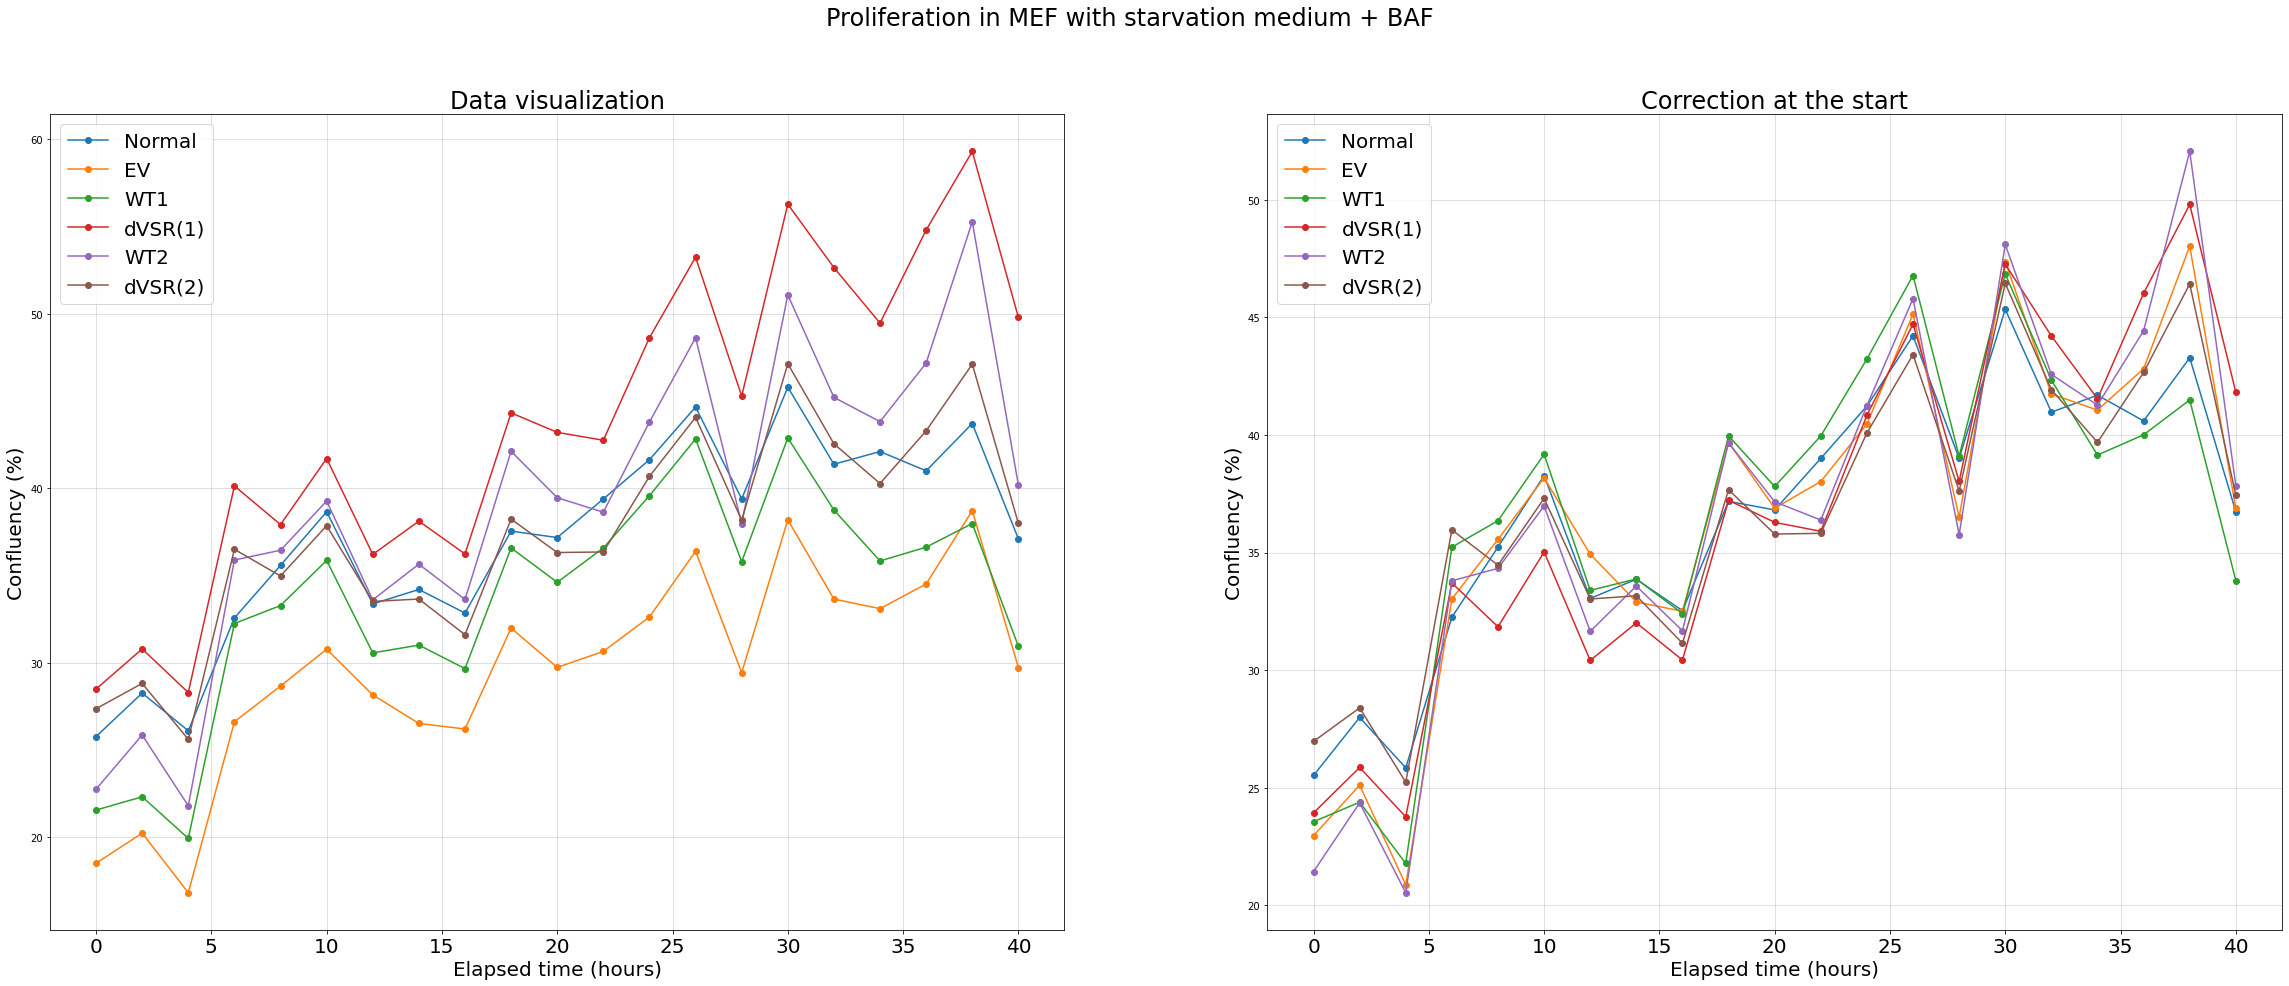

In [90]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' with normal medium + DMSO'],
            [prolif_rich_BAF, ' with normal medium + BAF'],
            [prolif_starv_DMSO, ' with starvation medium + DMSO'],
            [prolif_starv_BAF, ' with starvation medium + BAF']]
        
for data in all_data:
    condition_label = data[1]
    col_selection = data[0]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

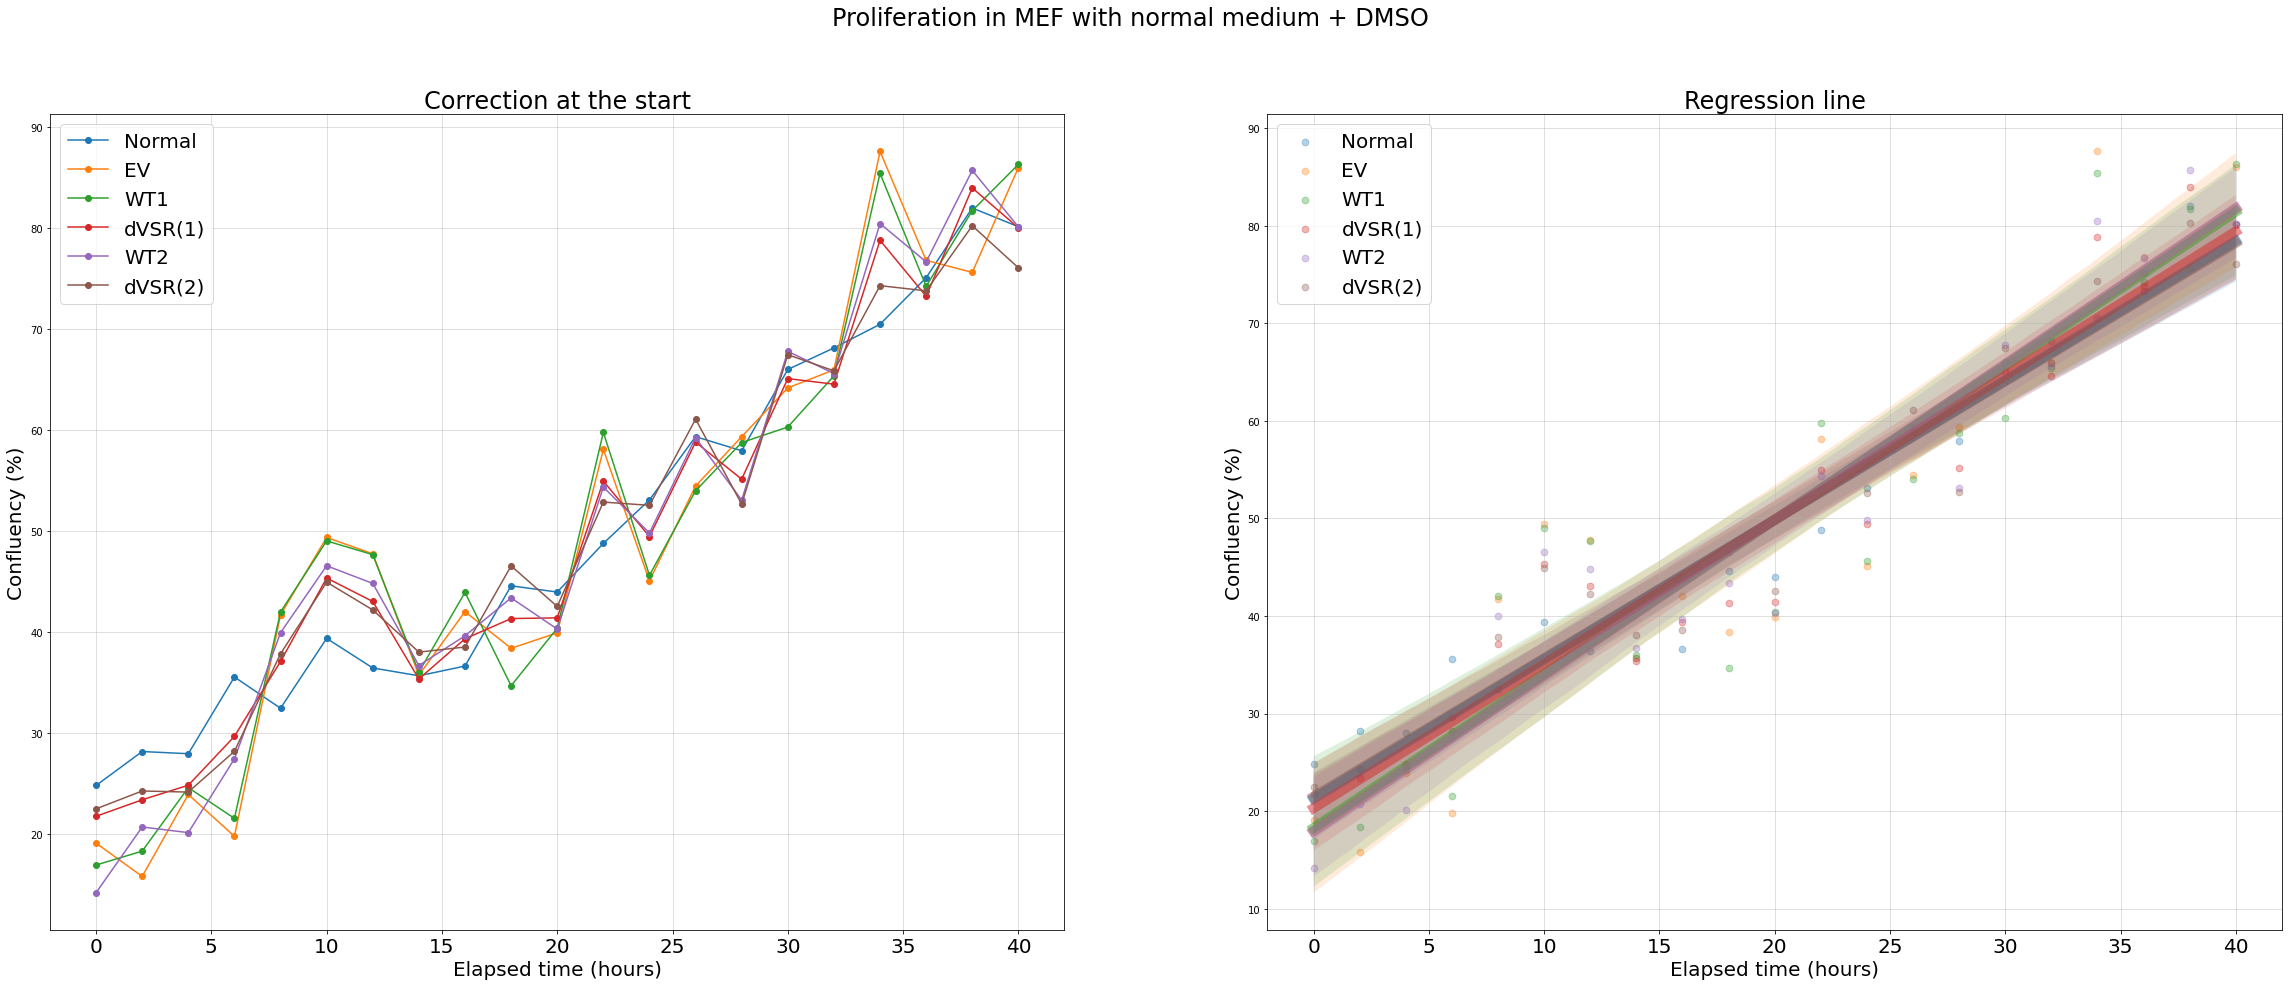

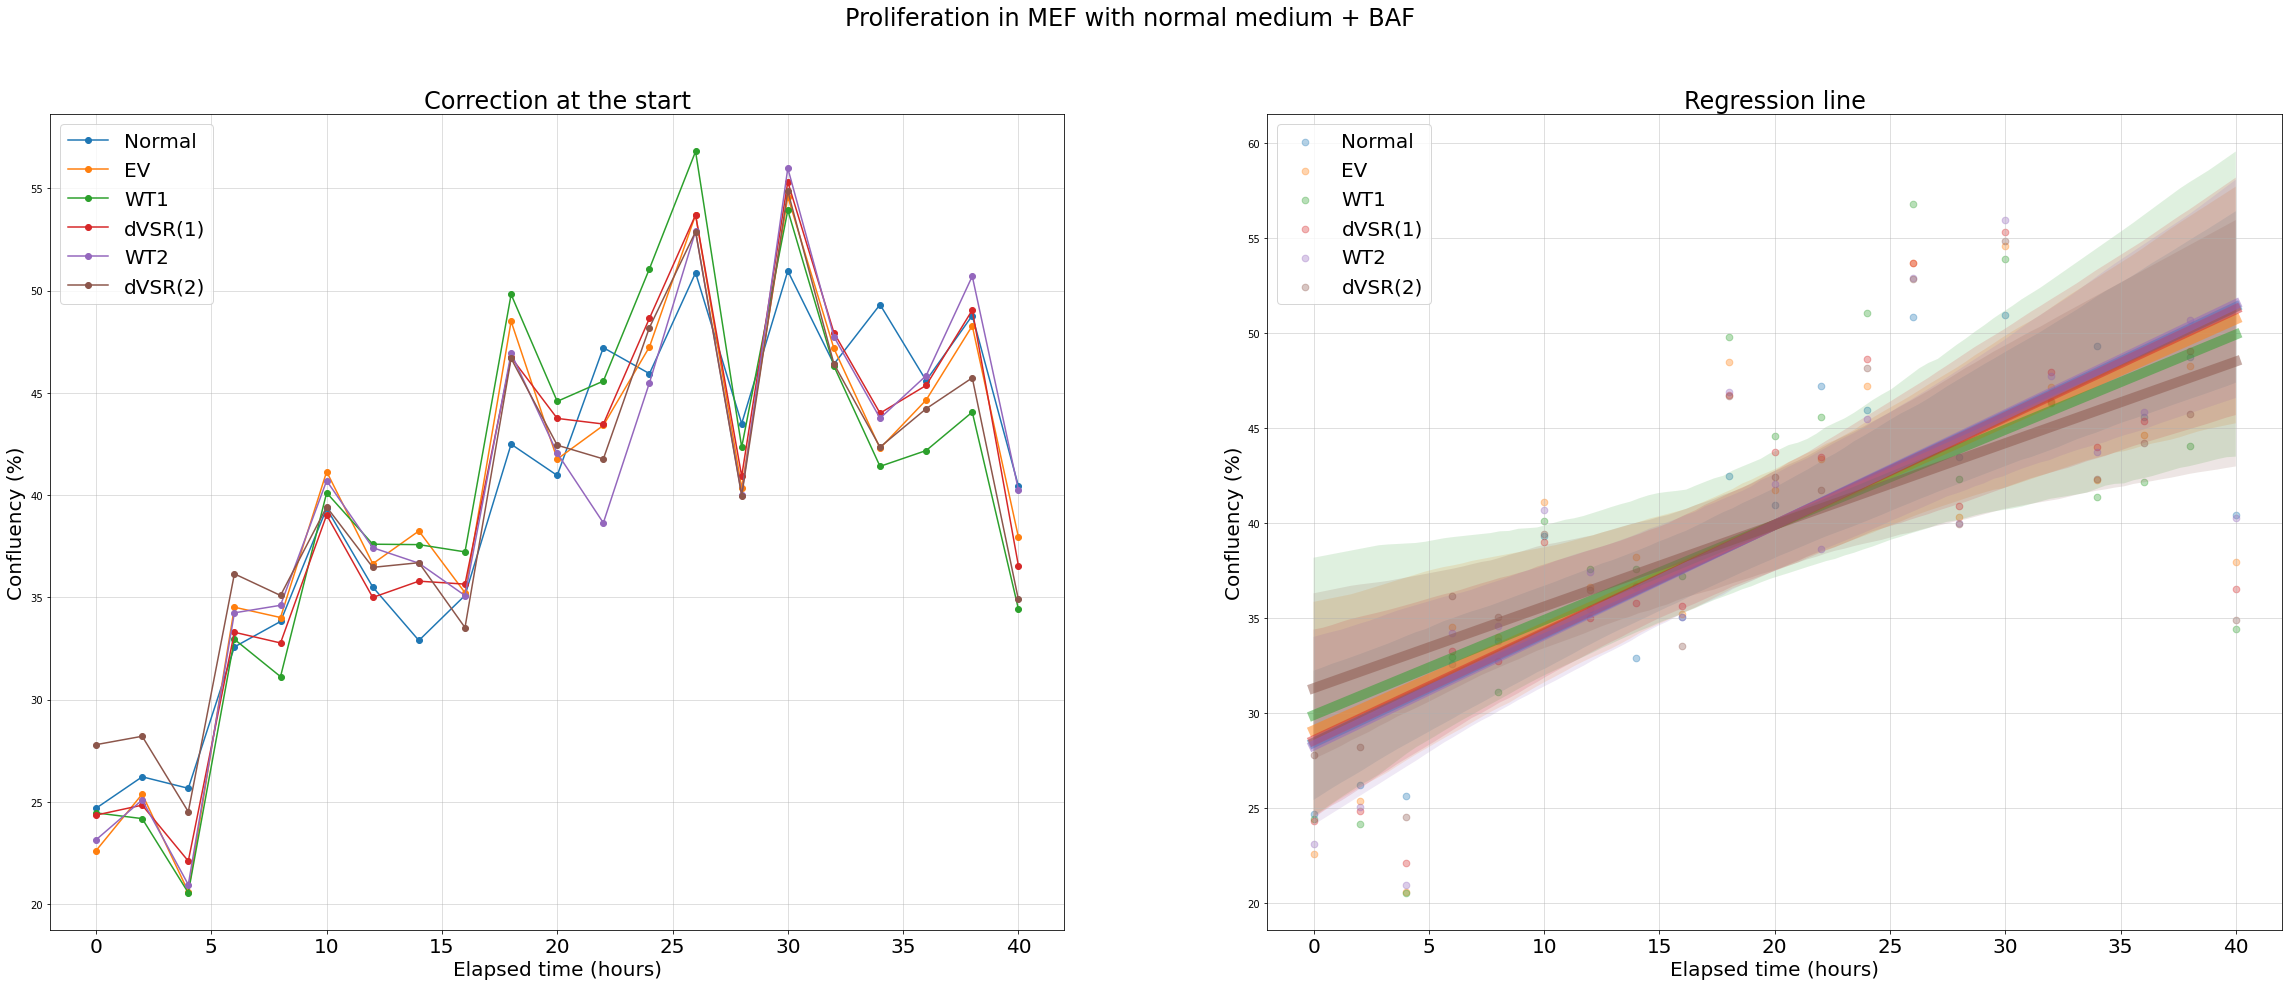

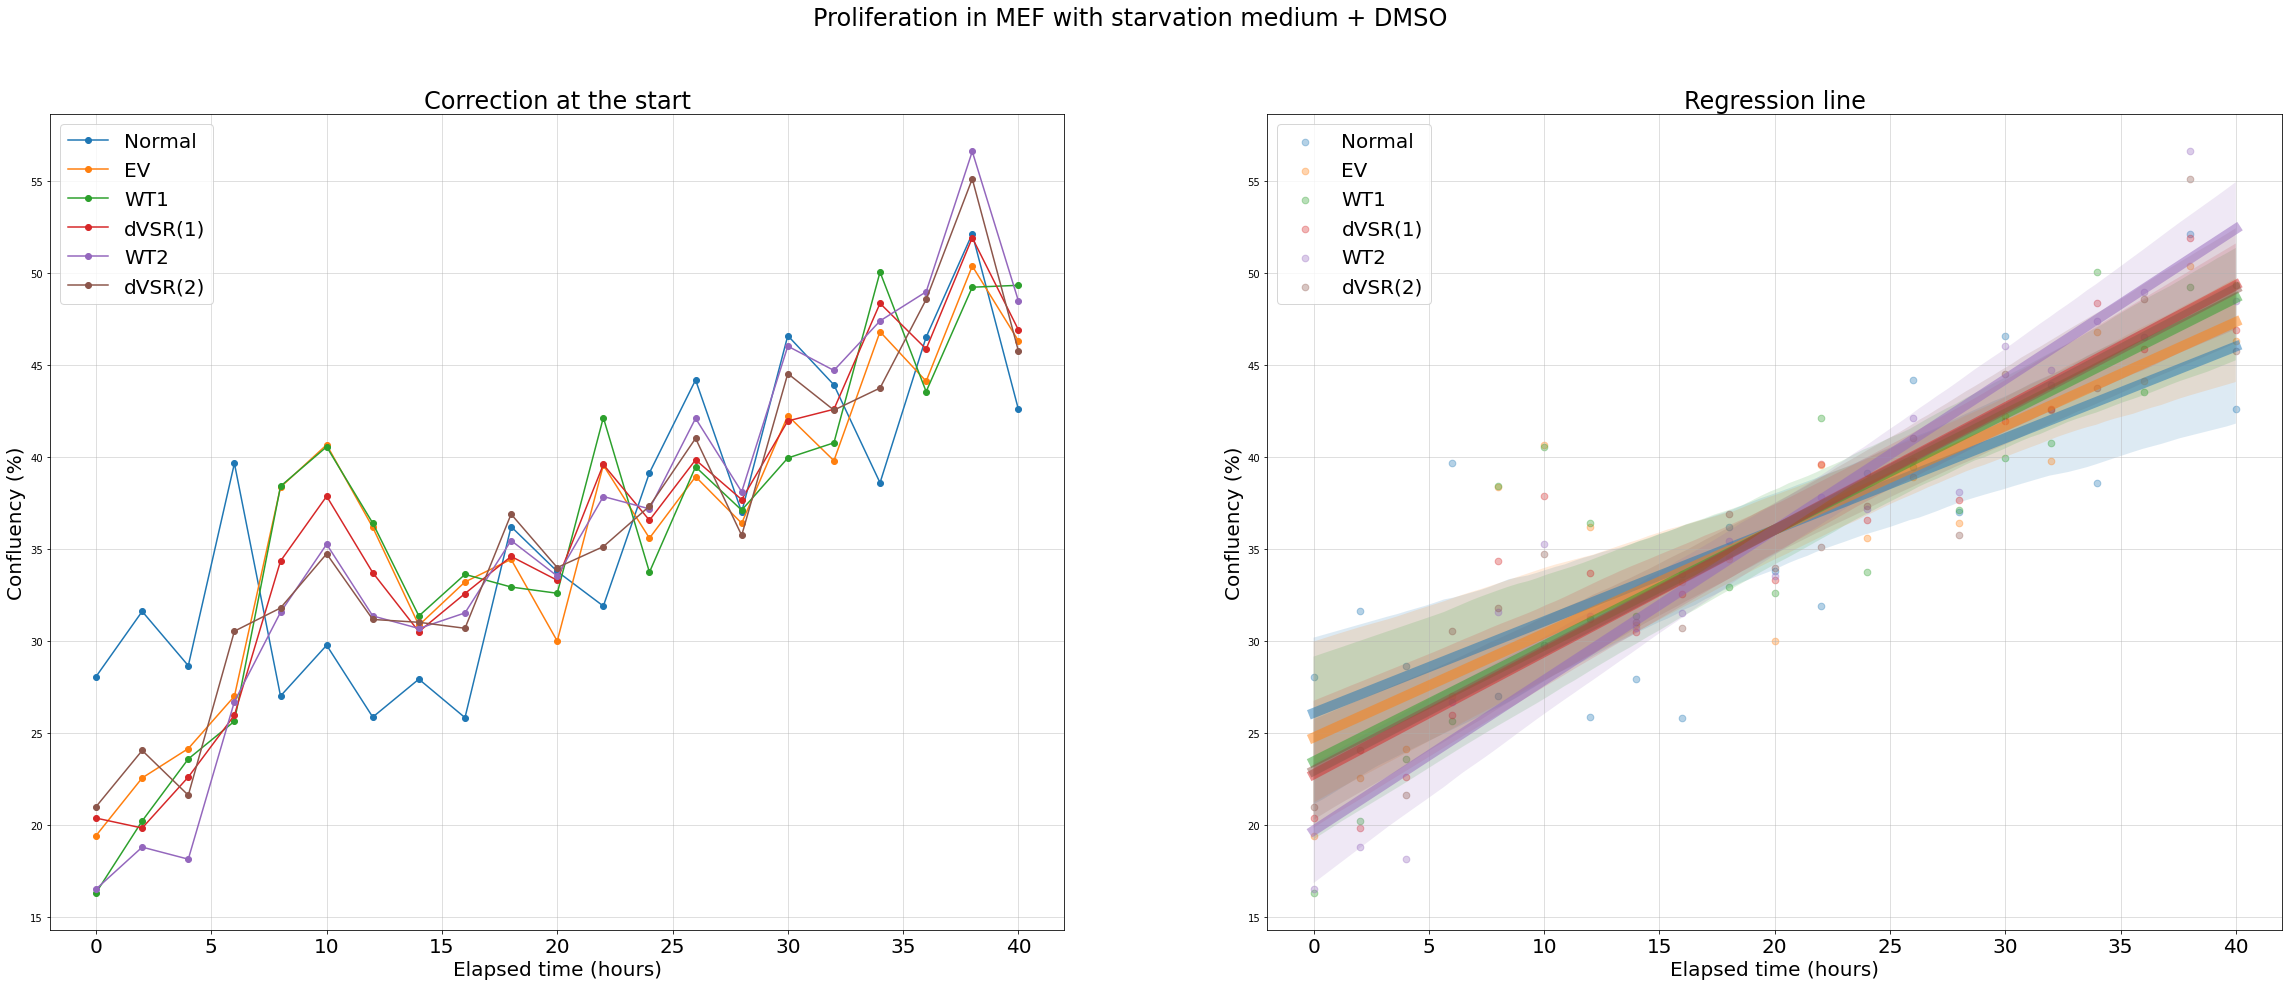

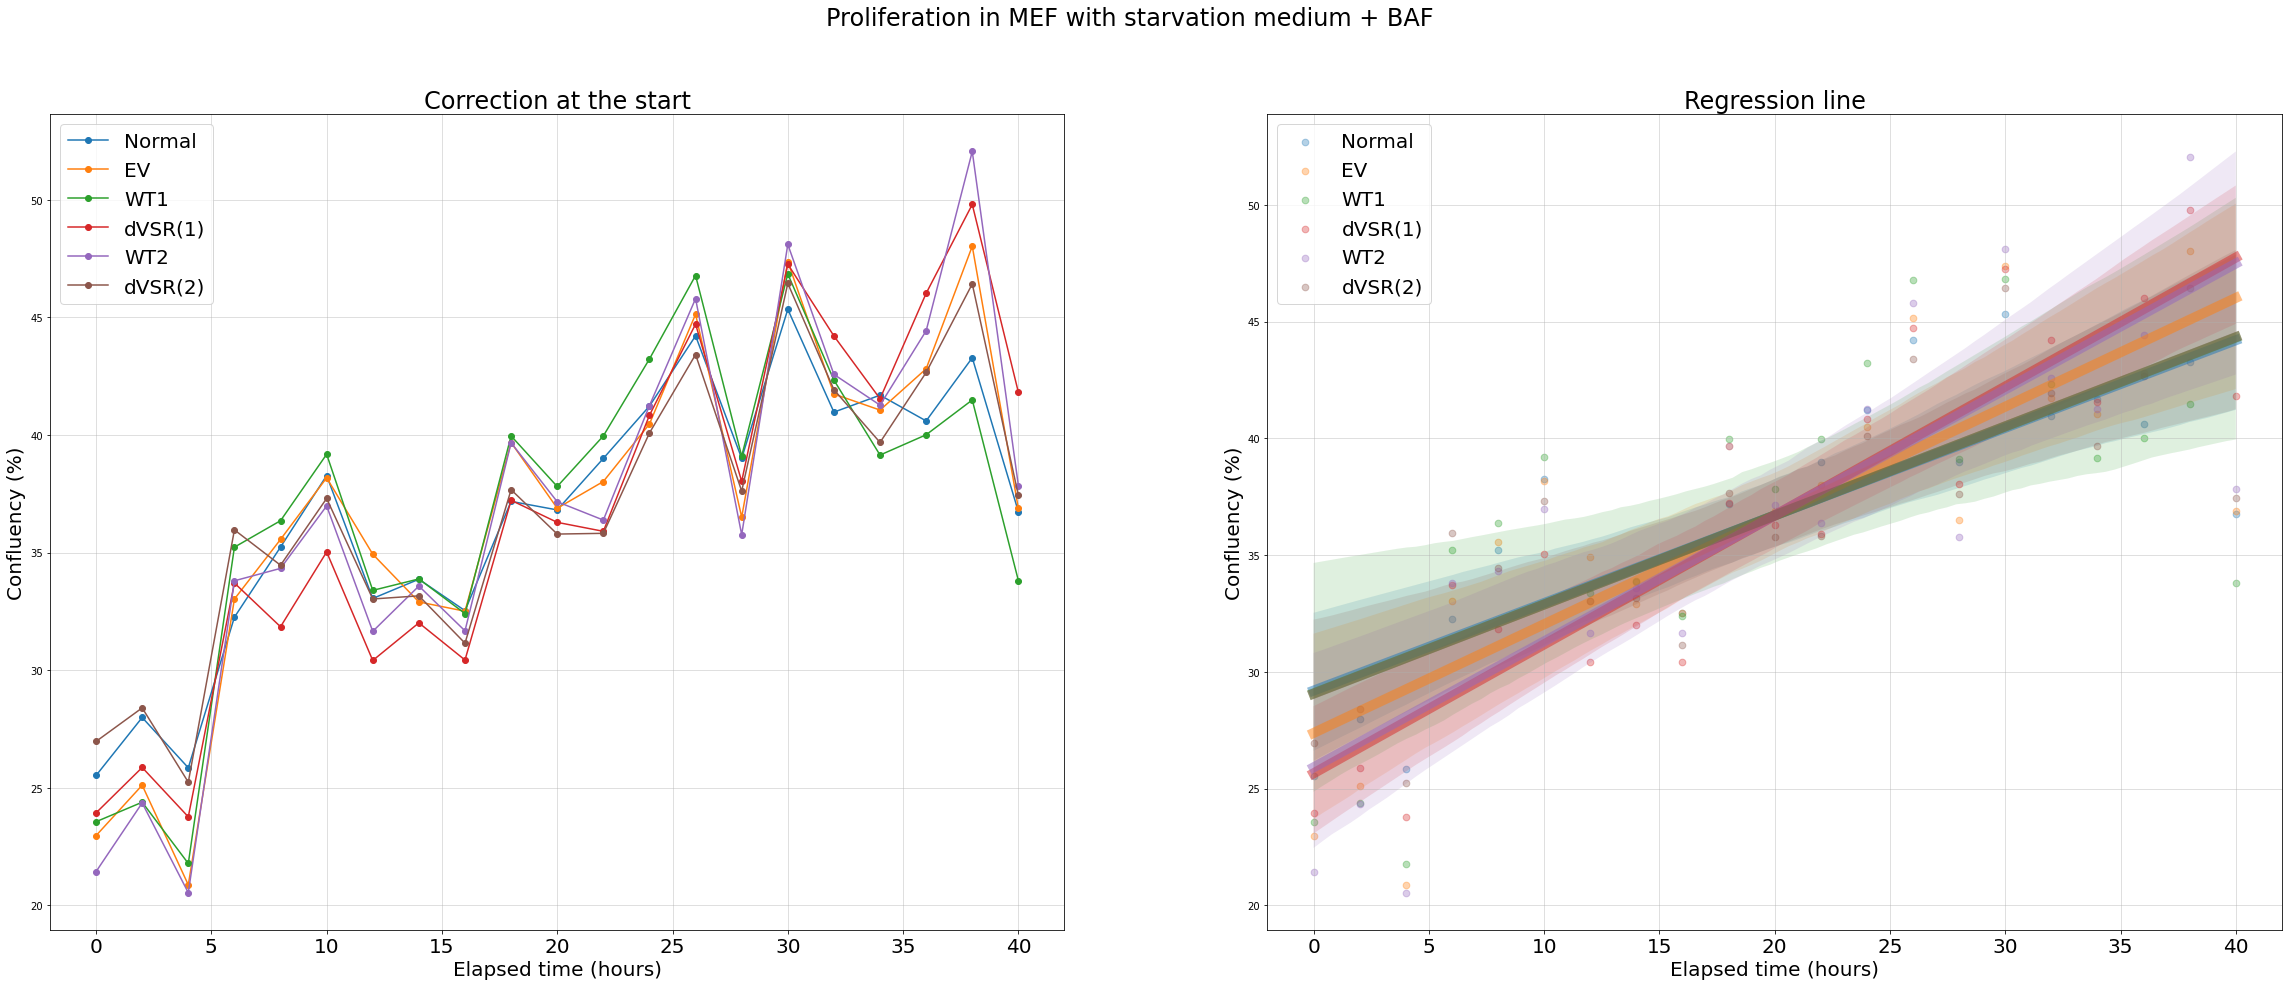

In [91]:
#Visualization of all data
all_data = [[prolif_rich_DMSO, ' with normal medium + DMSO'],
            [prolif_rich_BAF, ' with normal medium + BAF'],
            [prolif_starv_DMSO, ' with starvation medium + DMSO'],
            [prolif_starv_BAF, ' with starvation medium + BAF']]
        
for data in all_data:
    condition_label = data[1]
    col_selection = data[0]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
#         #graph 1, data visualization
#         x=prolif_df['Elapsed']
#         y=prolif_df[column]
#         ax[0].plot(x, y, 'o-', label= label_)
#         ax[0].grid(alpha = 0.5)
#         ax[0].legend()
#         ax[0].set_title("Data visualization")
#         ax[0].set_ylabel('Confluency (%)')
#         ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()